In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import hist, processor
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt

In [2]:
filename = "/pnfs/psi.ch/cms/trivcat/store/user/mmarcheg/RunIIFall17NanoAODv7/ttHTobb_M125_TuneCP5_13TeV-powheg-pythia8/587E2464-42CA-3A45-BD49-D23E49F658E6.root"
events = NanoEventsFactory.from_root(filename, schemaclass=NanoAODSchema).events()

In [3]:
print([field for field in events.fields if 'LHE' in field])
print([field for field in events.fields if 'Gen' in field])
print([field for field in events.GenJet.fields])

['LHEWeight', 'LHEPart', 'LHE', 'LHEReweightingWeight', 'LHEScaleWeight', 'LHEPdfWeight']
['GenIsolatedPhoton', 'GenDressedLepton', 'GenJet', 'GenVisTau', 'GenPart', 'GenMET', 'Generator', 'SubGenJetAK8', 'GenJetAK8']
['eta', 'mass', 'phi', 'pt', 'partonFlavour', 'hadronFlavour']


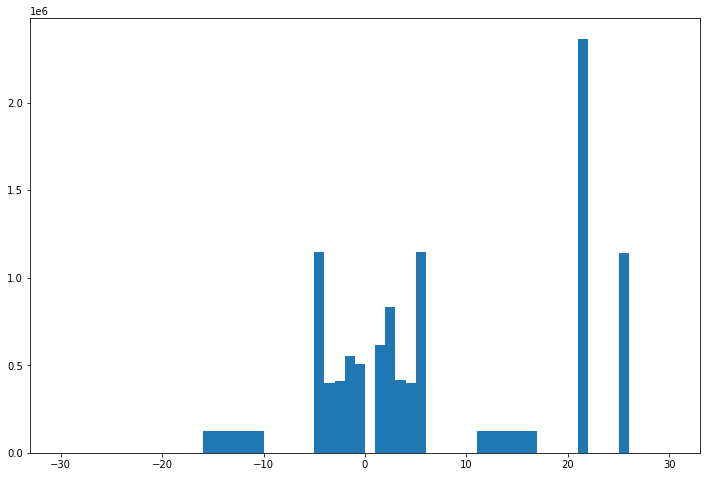

In [4]:
pdg = events.LHEPart.pdgId
plt.figure(figsize=[12,8])
plt.hist(ak.flatten(pdg), bins=np.arange(-30,31,1));

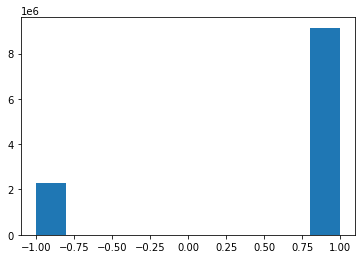

In [5]:
plt.hist(ak.flatten(events.LHEPart.status));

In [6]:
print("This is a dilepton event:")
for id in events[(ak.num(events.Electron.pt) + ak.num(events.Muon.pt)) == 2].LHEPart.pdgId[50]:
    print(id)

This is a dilepton event:
2
21
25
2
5
-5
-15
16
13
-14


In [7]:
print(events.Jet.genJetIdx[5])
print(events.GenJet[5].partonFlavour)

[1, 2, 0, -1, 3, 4, 5]
[5, -5, 21, 0, -5, 21]
